In [1]:
import numpy as np
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import pandas as pd


##NBA API works through PLAYER IDs, so we need to find the player ID for LeBron James


lebron_list = players.find_players_by_full_name("LeBron James")
if lebron_list:
    # Get the first player in the list (LeBron James)
    lebron = lebron_list[0]
    player_id = lebron['id']
    print("LeBron James player ID:", player_id)
else:
    raise Exception("Player not found.")

LeBron James player ID: 2544


In [2]:
import time

##Scraping the data from the API

regular_season_career = pd.DataFrame()
playoff_career = pd.DataFrame()

start_year = 2003
end_year = 2025

# Loop over each season
for season_year in range(start_year, end_year):
    # Format the season string
    season_str = f"{season_year}-{str(season_year + 1)[-2:]}"
    print(f"\nFetching game logs for season: {season_str}")

    # Regular Season
    try:
        reg_logs = playergamelog.PlayerGameLog(player_id=player_id, season=season_str, season_type_all_star='Regular Season')
        reg_df = reg_logs.get_data_frames()[0]


        reg_df['SEASON'] = season_str
        regular_season_career = pd.concat([regular_season_career, reg_df], ignore_index=True)
        print(f"  Regular season games fetched: {len(reg_df)}")
    except Exception as e:
        print(f"  Could not fetch regular season logs for {season_str}: {e}")

    # Playoffs
    try:
        playoff_logs = playergamelog.PlayerGameLog(player_id=player_id, season=season_str, season_type_all_star='Playoffs')
        playoff_df = playoff_logs.get_data_frames()[0]
        playoff_df['SEASON'] = season_str
        playoff_career = pd.concat([playoff_career, playoff_df], ignore_index=True)
        print(f"  Playoff games fetched: {len(playoff_df)}")
    except Exception as e:
        print(f"  Could not fetch playoff logs for {season_str}: {e}")

    time.sleep(1)

# Display the first few rows
print("\nComplete Regular Season Career Game Logs:")
print(regular_season_career.head())

print("\nComplete Playoff Career Game Logs:")
print(playoff_career.head())



Fetching game logs for season: 2003-04
  Regular season games fetched: 79
  Playoff games fetched: 0

Fetching game logs for season: 2004-05
  Regular season games fetched: 80
  Playoff games fetched: 0

Fetching game logs for season: 2005-06
  Regular season games fetched: 79
  Playoff games fetched: 13


/var/folders/jm/k0sbz0kn3lv4fr42mlqlgyz40000gn/T/ipykernel_8786/3320199079.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  playoff_career = pd.concat([playoff_career, playoff_df], ignore_index=True)



Fetching game logs for season: 2006-07
  Regular season games fetched: 78
  Playoff games fetched: 20

Fetching game logs for season: 2007-08
  Regular season games fetched: 75
  Playoff games fetched: 13

Fetching game logs for season: 2008-09
  Regular season games fetched: 81
  Playoff games fetched: 14

Fetching game logs for season: 2009-10
  Regular season games fetched: 76
  Playoff games fetched: 11

Fetching game logs for season: 2010-11
  Regular season games fetched: 79
  Playoff games fetched: 21

Fetching game logs for season: 2011-12
  Regular season games fetched: 62
  Playoff games fetched: 23

Fetching game logs for season: 2012-13
  Regular season games fetched: 76
  Playoff games fetched: 23

Fetching game logs for season: 2013-14
  Regular season games fetched: 77
  Playoff games fetched: 20

Fetching game logs for season: 2014-15
  Regular season games fetched: 69
  Playoff games fetched: 20

Fetching game logs for season: 2015-16
  Regular season games fetched: 7

/var/folders/jm/k0sbz0kn3lv4fr42mlqlgyz40000gn/T/ipykernel_8786/3320199079.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  playoff_career = pd.concat([playoff_career, playoff_df], ignore_index=True)



Fetching game logs for season: 2019-20
  Regular season games fetched: 67
  Playoff games fetched: 21

Fetching game logs for season: 2020-21
  Regular season games fetched: 45
  Playoff games fetched: 6

Fetching game logs for season: 2021-22
  Regular season games fetched: 56
  Playoff games fetched: 0


/var/folders/jm/k0sbz0kn3lv4fr42mlqlgyz40000gn/T/ipykernel_8786/3320199079.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  playoff_career = pd.concat([playoff_career, playoff_df], ignore_index=True)



Fetching game logs for season: 2022-23
  Regular season games fetched: 55
  Playoff games fetched: 16

Fetching game logs for season: 2023-24
  Regular season games fetched: 71
  Playoff games fetched: 5

Fetching game logs for season: 2024-25
  Regular season games fetched: 70
  Playoff games fetched: 5

Complete Regular Season Career Game Logs:
  SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0     22003       2544  0020301179  Apr 14, 2004    CLE @ NYK  W   35    8   
1     22003       2544  0020301162  Apr 12, 2004  CLE vs. MIL  W   45    9   
2     22003       2544  0020301151  Apr 10, 2004  CLE vs. MIA  W   32    4   
3     22003       2544  0020301137  Apr 09, 2004    CLE @ MIA  L   42    6   
4     22003       2544  0020301128  Apr 07, 2004    CLE @ MEM  L   36    4   

   FGA  FG_PCT  ...  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0   17   0.471  ...    1    5    3    0    5   1   17          -6   
1   20   0.450  ...    7    9    2    0    

In [3]:
print(regular_season_career.head())
print(regular_season_career.columns)

  SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0     22003       2544  0020301179  Apr 14, 2004    CLE @ NYK  W   35    8   
1     22003       2544  0020301162  Apr 12, 2004  CLE vs. MIL  W   45    9   
2     22003       2544  0020301151  Apr 10, 2004  CLE vs. MIA  W   32    4   
3     22003       2544  0020301137  Apr 09, 2004    CLE @ MIA  L   42    6   
4     22003       2544  0020301128  Apr 07, 2004    CLE @ MEM  L   36    4   

   FGA  FG_PCT  ...  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0   17   0.471  ...    1    5    3    0    5   1   17          -6   
1   20   0.450  ...    7    9    2    0    1   1   27          11   
2   11   0.364  ...    3   11    0    0    2   3   10          14   
3   14   0.429  ...    7    8    1    0    8   2   24         -16   
4   11   0.364  ...    3    5    3    0    2   4   14         -11   

   VIDEO_AVAILABLE   SEASON  
0                0  2003-04  
1                0  2003-04  
2                0  2003-0

In [4]:
regular_season_career.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,SEASON
0,22003,2544,0020301179,"Apr 14, 2004",CLE @ NYK,W,35,8,17,0.471,...,1,5,3,0,5,1,17,-6,0,2003-04
1,22003,2544,0020301162,"Apr 12, 2004",CLE vs. MIL,W,45,9,20,0.450,...,7,9,2,0,1,1,27,11,0,2003-04
2,22003,2544,0020301151,"Apr 10, 2004",CLE vs. MIA,W,32,4,11,0.364,...,3,11,0,0,2,3,10,14,0,2003-04
3,22003,2544,0020301137,"Apr 09, 2004",CLE @ MIA,L,42,6,14,0.429,...,7,8,1,0,8,2,24,-16,0,2003-04
4,22003,2544,0020301128,"Apr 07, 2004",CLE @ MEM,L,36,4,11,0.364,...,3,5,3,0,2,4,14,-11,0,2003-04


In [5]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from sqlalchemy import text

# parameters
host_ip = "3.16.186.38"
id = "test1" # Use your 'test1' username you created in Lab 10.
pw = "Test1234#"  # Use your 'Test1234#' password you created in Lab 10.

# connect to mysql server
url = URL.create(
    drivername="mysql+pymysql",
    host=host_ip,
    port=3306,
    username= id,
    password=pw)

sqlEngine = create_engine(url)
sql_connection = sqlEngine.connect()

In [6]:
sql_connection.execute(text('DROP DATABASE IF EXISTS LebronDatabase'))

In [7]:
# Make a new database. For your project, make sure you only run this step once at the beginning. You must be able to see the database in Workbench after running this command.
sql_connection.execute(text("CREATE DATABASE IF NOT EXISTS LebronDatabase"))

In [8]:
db_url = URL.create(
    drivername="mysql+pymysql",
    host=host_ip,
    port=3306,
    username=id,
    password=pw,
    database="LebronDatabase"
)

db_engine = create_engine(db_url)

In [9]:

regular_season_career.to_sql(name='RegularBoxScores', con=db_engine, if_exists='replace')


1562

In [10]:
playoff_career.to_sql(name='PlayoffBoxScores', con=db_engine, if_exists='replace')

292

In [11]:
regular_df = pd.read_sql("SELECT * FROM LebronDatabase.RegularBoxScores", db_engine)
playoff_df = pd.read_sql("SELECT * FROM LebronDatabase.PlayoffBoxScores", db_engine)

print(regular_df.head())

   index SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  \
0      0     22003       2544  0020301179  Apr 14, 2004    CLE @ NYK  W   35   
1      1     22003       2544  0020301162  Apr 12, 2004  CLE vs. MIL  W   45   
2      2     22003       2544  0020301151  Apr 10, 2004  CLE vs. MIA  W   32   
3      3     22003       2544  0020301137  Apr 09, 2004    CLE @ MIA  L   42   
4      4     22003       2544  0020301128  Apr 07, 2004    CLE @ MEM  L   36   

   FGM  FGA  ...  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0    8   17  ...    1    5    3    0    5   1   17          -6   
1    9   20  ...    7    9    2    0    1   1   27          11   
2    4   11  ...    3   11    0    0    2   3   10          14   
3    6   14  ...    7    8    1    0    8   2   24         -16   
4    4   11  ...    3    5    3    0    2   4   14         -11   

   VIDEO_AVAILABLE   SEASON  
0                0  2003-04  
1                0  2003-04  
2                0  2003-04  
3 

In [12]:
regular_df.columns

Index(['index', 'SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'SEASON'],
      dtype='object')

In [13]:
playoff_df.columns

Index(['index', 'SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'SEASON'],
      dtype='object')

In [14]:
regular_df['Season_Type'] = 'Regular'
playoff_df['Season_Type'] = 'Playoffs'
games = pd.concat([regular_df, playoff_df], ignore_index=True)

In [15]:
def get_team(year):
    if year <= 2010:
        return "CLE"
    elif 2011 <= year <= 2014:
        return "MIA"
    elif 2015 <= year <= 2018:
        return "CLE"
    elif year >= 2019:
        return "LAL"
    else:
        return None
def extract_opponent(row):
    # MATCHUP format: "TEAM1 vs. TEAM2" or "TEAM1 @ TEAM2"
    parts = row['MATCHUP'].split()
    if parts[1] in ['vs.', '@']:
        if parts[0] == row['TEAM']:
            return parts[2]
        else:
            return parts[0]
    return None


In [16]:
games = games.drop(columns = ['index',"Player_ID", "VIDEO_AVAILABLE"])
games['SEASON_YEAR'] = 2000+(games['SEASON'].str[-2:].astype(int))
games['TEAM'] = games['SEASON_YEAR'].astype(int).apply(get_team)
games['OPPONENT'] = games.apply(extract_opponent, axis=1)

In [17]:
games[games['TEAM'] == "MIA"]

,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,...,BLK,TOV,PF,PTS,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT
548,22010,0021001202,"Apr 11, 2011",MIA @ ATL,W,43,10,21,0.476,2,...,0,7,1,34,7,2010-11,Regular,2011,MIA,ATL
549,22010,0021001194,"Apr 10, 2011",MIA vs. BOS,W,37,11,19,0.579,0,...,1,4,1,27,24,2010-11,Regular,2011,MIA,BOS
550,22010,0021001182,"Apr 08, 2011",MIA vs. CHA,W,37,9,16,0.563,0,...,1,1,2,23,12,2010-11,Regular,2011,MIA,CHA
551,22010,0021001164,"Apr 06, 2011",MIA vs. MIL,L,39,10,22,0.455,3,...,2,4,2,29,-10,2010-11,Regular,2011,MIA,MIL
552,22010,0021001142,"Apr 03, 2011",MIA @ NJN,W,39,13,18,0.722,0,...,0,7,2,31,13,2010-11,Regular,2011,MIA,NJN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,42013,0041300211,"May 06, 2014",MIA vs. BKN,W,36,10,15,0.667,0,...,0,1,2,22,10,2013-14,Playoffs,2014,MIA,BKN
1716,42013,0041300114,"Apr 28, 2014",MIA @ CHA,W,43,10,19,0.526,1,...,1,2,3,31,12,2013-14,Playoffs,2014,MIA,CHA
1717,42013,0041300113,"Apr 26, 2014",MIA @ CHA,W,36,10,18,0.556,1,...,0,2,1,30,20,2013-14,Playoffs,2014,MIA,CHA
1718,42013,0041300112,"Apr 23, 2014",MIA vs. CHA,W,40,11,17,0.647,1,...,0,4,2,32,6,2013-14,Playoffs,2014,MIA,CHA


In [18]:
games.to_sql(name='games', con=db_engine, if_exists='replace')

1854

In [19]:
games = pd.read_sql("SELECT * FROM LebronDatabase.games", db_engine, parse_dates=['GAME_DATE'])

In [20]:
games

,index,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,BLK,TOV,PF,PTS,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT
0,0,22003,0020301179,2004-04-14,CLE @ NYK,W,35,8,17,0.471,...,0,5,1,17,-6,2003-04,Regular,2004,CLE,NYK
1,1,22003,0020301162,2004-04-12,CLE vs. MIL,W,45,9,20,0.450,...,0,1,1,27,11,2003-04,Regular,2004,CLE,MIL
2,2,22003,0020301151,2004-04-10,CLE vs. MIA,W,32,4,11,0.364,...,0,2,3,10,14,2003-04,Regular,2004,CLE,MIA
3,3,22003,0020301137,2004-04-09,CLE @ MIA,L,42,6,14,0.429,...,0,8,2,24,-16,2003-04,Regular,2004,CLE,MIA
4,4,22003,0020301128,2004-04-07,CLE @ MEM,L,36,4,11,0.364,...,0,2,4,14,-11,2003-04,Regular,2004,CLE,MEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,1849,42024,0042400165,2025-04-30,LAL vs. MIN,L,40,9,21,0.429,...,0,3,2,22,-14,2024-25,Playoffs,2025,LAL,MIN
1850,1850,42024,0042400164,2025-04-27,LAL @ MIN,L,46,5,9,0.556,...,3,3,2,27,-4,2024-25,Playoffs,2025,LAL,MIN
1851,1851,42024,0042400163,2025-04-25,LAL @ MIN,L,41,13,21,0.619,...,2,1,0,38,-10,2024-25,Playoffs,2025,LAL,MIN
1852,1852,42024,0042400162,2025-04-22,LAL vs. MIN,W,40,8,19,0.421,...,1,2,4,21,9,2024-25,Playoffs,2025,LAL,MIN


In [21]:
games = games.sort_values(by=['GAME_DATE'], ascending=True)
games = games.reset_index(drop=True)
games = games.drop(columns = ['index'])

In [22]:
games.describe()

,GAME_DATE,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,SEASON_YEAR
count,1854,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,...,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,2014-01-30 06:00:23.300970752,38.360841,9.956311,19.723301,0.506047,1.639159,4.727616,0.309739,5.672060,7.688242,...,6.536138,7.744876,7.378101,1.530744,0.773463,3.515642,1.857605,27.223840,4.679072,2013.975728
min,2003-10-29 00:00:00,11.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-39.000000,2004.000000
25%,2008-12-21 12:00:00,35.000000,8.000000,16.000000,0.435000,0.250000,3.000000,0.025000,3.000000,4.000000,...,5.000000,6.000000,5.000000,1.000000,0.000000,2.000000,1.000000,22.000000,-4.000000,2009.000000
50%,2013-12-17 00:00:00,39.000000,10.000000,20.000000,0.500000,1.000000,4.000000,0.333000,5.000000,7.000000,...,6.000000,7.000000,7.000000,1.000000,1.000000,3.000000,2.000000,27.000000,5.500000,2014.000000
75%,2018-11-02 06:00:00,42.000000,12.000000,23.000000,0.579000,2.000000,6.000000,0.500000,8.000000,10.000000,...,8.000000,10.000000,9.000000,2.000000,1.000000,5.000000,3.000000,32.000000,14.000000,2019.000000
max,2025-04-30 00:00:00,55.000000,23.000000,38.000000,0.929000,9.000000,14.000000,1.000000,24.000000,28.000000,...,19.000000,20.000000,19.000000,7.000000,5.000000,11.000000,6.000000,61.000000,46.000000,2025.000000
std,NaN,5.282091,3.098618,4.817952,0.110507,1.506524,2.529208,0.240165,3.425612,4.178802,...,2.804772,3.130575,2.937738,1.263833,0.913665,1.864406,1.284304,7.832023,13.020927,6.118276


In [23]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [24]:
features = ['MIN', 'FG3M', 'FG3A', 'FTM', 'FTA','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS']
X = games[features]


##Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


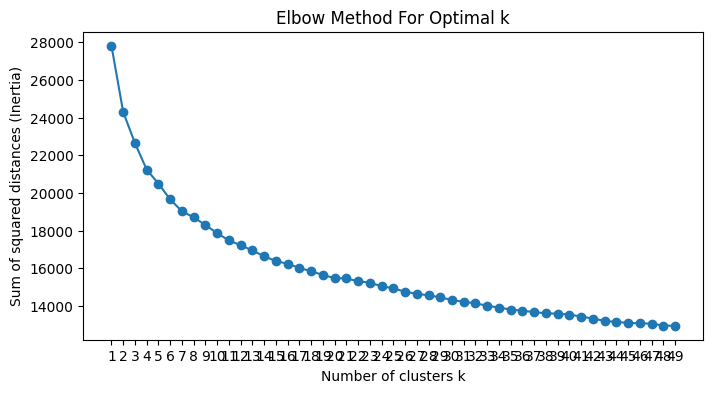

In [25]:
##Elbow Method
inertia = []
K = range(1, 50)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'o-', markersize=6)
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.show()

In [26]:
#Final with best K
best_k = 12
kmeans = KMeans(n_clusters=best_k, random_state=42)
games['cluster'] = kmeans.fit_predict(X_scaled)

#Looking at centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centers, columns=features)
print("Centroids (in original feature units):")
print(centroid_df)

#Cluster stats
print("\nCluster sizes:")
print(games['cluster'].value_counts())

Centroids (in original feature units):
          MIN      FG3M      FG3A        FTM        FTA      OREB       DREB  \
0   36.670391  3.664804  7.586592   3.715084   5.469274  0.715084   5.117318   
1   36.819588  0.896907  3.371134   4.623711   6.319588  1.134021   8.958763   
2   41.828571  1.335714  4.621429   7.835714  10.478571  2.035714   5.064286   
3   34.919463  0.738255  3.255034   3.281879   4.805369  0.825503   4.248322   
4   42.362832  1.203540  4.362832  13.088496  16.504425  1.292035   7.610619   
5   37.748538  2.058480  6.198830   3.479532   5.280702  1.385965   8.292398   
6   42.669355  1.564516  5.379032   6.298387   8.814516  3.008065  10.612903   
7   40.685039  1.598425  4.472441   7.259843   9.440945  1.070866   7.370079   
8   39.895522  1.049751  3.786070   7.945274  10.353234  0.840796   4.810945   
9   30.644444  1.166667  3.188889   3.794444   5.150000  0.700000   4.666667   
10  41.298969  4.865979  9.175258   7.608247  10.144330  1.319588   8.072165   
1

In [27]:
games.loc[X.index, 'cluster'] = kmeans.fit_predict(X_scaled)

In [28]:
games.head()

,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,...,TOV,PF,PTS,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster
0,22003,0020300014,2003-10-29,CLE @ SAC,L,42,12,20,0.600,0,...,2,3,25,-9,2003-04,Regular,2004,CLE,SAC,11
1,22003,0020300018,2003-10-30,CLE @ PHX,L,41,8,17,0.471,1,...,7,1,21,-3,2003-04,Regular,2004,CLE,PHX,5
2,22003,0020300038,2003-11-01,CLE @ POR,L,39,3,12,0.250,0,...,2,3,8,-21,2003-04,Regular,2004,CLE,POR,3
3,22003,0020300057,2003-11-05,CLE vs. DEN,L,41,3,11,0.273,0,...,2,1,7,-3,2003-04,Regular,2004,CLE,DEN,1
4,22003,0020300068,2003-11-07,CLE @ IND,L,44,8,18,0.444,1,...,7,2,23,-7,2003-04,Regular,2004,CLE,IND,3


In [29]:
def find_similar_games(games_df, features, game_idx, n_neighbors=5):
    selected_cluster = games_df.loc[game_idx, 'cluster']
    
    mask = games_df['cluster'] == selected_cluster
    cluster_indices = games_df.index[mask]
    X_cluster = games_df.loc[mask, features]

    nn = NearestNeighbors(n_neighbors=n_neighbors+1, metric='euclidean')
    nn.fit(X_cluster)
    
    selected_vec = games_df.loc[[game_idx], features]
    
    distances, neighbors = nn.kneighbors(selected_vec)
    
    similar_idxs = cluster_indices[neighbors.flatten()][1:]  # drop itself
    return list(similar_idxs)


sim_cols = pd.DataFrame(
    games.index.map(
        lambda idx: find_similar_games(games, features, game_idx=idx, n_neighbors=5)
    ).tolist(),
    index=games.index,
    columns=[f'similar_game_{i+1}' for i in range(5)]
)

# 3) Join those 5 new columns back onto your original df
games = games.join(sim_cols)



In [30]:
games

,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,...,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster,similar_game_1,similar_game_2,similar_game_3,similar_game_4,similar_game_5
0,22003,0020300014,2003-10-29,CLE @ SAC,L,42,12,20,0.600,0,...,Regular,2004,CLE,SAC,11,70,1776,679,831,905
1,22003,0020300018,2003-10-30,CLE @ PHX,L,41,8,17,0.471,1,...,Regular,2004,CLE,PHX,5,1063,758,1521,31,924
2,22003,0020300038,2003-11-01,CLE @ POR,L,39,3,12,0.250,0,...,Regular,2004,CLE,POR,3,1734,1782,1002,93,415
3,22003,0020300057,2003-11-05,CLE vs. DEN,L,41,3,11,0.273,0,...,Regular,2004,CLE,DEN,1,1839,1445,422,1730,183
4,22003,0020300068,2003-11-07,CLE @ IND,L,44,8,18,0.444,1,...,Regular,2004,CLE,IND,3,963,933,1000,788,1539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,42024,0042400161,2025-04-19,LAL vs. MIN,L,36,8,18,0.444,1,...,Playoffs,2025,LAL,MIN,3,426,718,260,65,1794
1850,42024,0042400162,2025-04-22,LAL vs. MIN,W,40,8,19,0.421,1,...,Playoffs,2025,LAL,MIN,6,391,860,815,1076,1612
1851,42024,0042400163,2025-04-25,LAL @ MIN,L,41,13,21,0.619,5,...,Playoffs,2025,LAL,MIN,10,1049,1630,739,999,1584
1852,42024,0042400164,2025-04-27,LAL @ MIN,L,46,5,9,0.556,2,...,Playoffs,2025,LAL,MIN,4,675,289,249,287,428


In [31]:
games.to_sql(name='games', con=db_engine, if_exists='replace')

1854

In [32]:
games = pd.read_sql("SELECT * FROM LebronDatabase.games", db_engine, parse_dates=['GAME_DATE'])

In [33]:
games

,index,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster,similar_game_1,similar_game_2,similar_game_3,similar_game_4,similar_game_5
0,0,22003,0020300014,2003-10-29,CLE @ SAC,L,42,12,20,0.600,...,Regular,2004,CLE,SAC,11,70,1776,679,831,905
1,1,22003,0020300018,2003-10-30,CLE @ PHX,L,41,8,17,0.471,...,Regular,2004,CLE,PHX,5,1063,758,1521,31,924
2,2,22003,0020300038,2003-11-01,CLE @ POR,L,39,3,12,0.250,...,Regular,2004,CLE,POR,3,1734,1782,1002,93,415
3,3,22003,0020300057,2003-11-05,CLE vs. DEN,L,41,3,11,0.273,...,Regular,2004,CLE,DEN,1,1839,1445,422,1730,183
4,4,22003,0020300068,2003-11-07,CLE @ IND,L,44,8,18,0.444,...,Regular,2004,CLE,IND,3,963,933,1000,788,1539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,1849,42024,0042400161,2025-04-19,LAL vs. MIN,L,36,8,18,0.444,...,Playoffs,2025,LAL,MIN,3,426,718,260,65,1794
1850,1850,42024,0042400162,2025-04-22,LAL vs. MIN,W,40,8,19,0.421,...,Playoffs,2025,LAL,MIN,6,391,860,815,1076,1612
1851,1851,42024,0042400163,2025-04-25,LAL @ MIN,L,41,13,21,0.619,...,Playoffs,2025,LAL,MIN,10,1049,1630,739,999,1584
1852,1852,42024,0042400164,2025-04-27,LAL @ MIN,L,46,5,9,0.556,...,Playoffs,2025,LAL,MIN,4,675,289,249,287,428


In [34]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

In [35]:
# Define features
features = ['MIN', 'FG3M', 'FG3A', 'FTM', 'FTA','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS']

# Load data from SQL
games = pd.read_sql("SELECT * FROM LebronDatabase.games", db_engine, parse_dates=['GAME_DATE'])


# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("LeBron James Career Statistics Dashboard", style={'textAlign': 'center'}),
    
    # First row - Time Series and Bar Chart
    html.Div([
        # Time Series Graph
        html.Div([
            html.H3("Statistic Over Time"),
            dcc.Dropdown(
                id='stat-dropdown',
                options=[{'label': col, 'value': col} for col in features],
                value='PTS',
                style={'width': '100%'}
            ),
            dcc.Graph(id='time-series-graph')
        ], style={'width': '50%', 'display': 'inline-block'}),
        


        # Bar Chart
        html.Div([
            html.H3("Average by Team"),
            #season‐type dropdown
            dcc.Dropdown(
                id='season-type-dropdown',
                options=[
                    {'label': 'Regular', 'value': 'Regular'},
                    {'label': 'Playoffs', 'value': 'Playoffs'},
                ],
                value=['Regular', 'Playoffs'],  #select both by default
                multi=True,
                style={'width': '100%', 'margin-bottom': '10px'}
            ),
            dcc.Graph(id='team-bar-chart')
        ], style={'width': '50%', 'display': 'inline-block'})
    ]),
    
    # Second row - Scatter Plot
    html.Div([
        html.H3("Statistic Comparison"),
        html.Div([
            dcc.Dropdown(
                id='x-stat-dropdown',
                options=[{'label': col, 'value': col} for col in features],
                value='PTS',
                style={'width': '100%'}
            ),
            dcc.Dropdown(
                id='y-stat-dropdown',
                options=[{'label': col, 'value': col} for col in features],
                value='AST',
                style={'width': '100%'}
            ),
            dcc.DatePickerSingle(
                id='game-date-picker',
                date=games['GAME_DATE'].median().date(),
                display_format='YYYY-MM-DD',
                style={'width': '30%', 'display':'inline-block'}
            ),
            dcc.Graph(id='scatter-plot')
        ], style={'width': '100%'})
    ])
])

# Callback for time series graph
@app.callback(
    Output('time-series-graph', 'figure'),
    Input('stat-dropdown', 'value')
)
def update_time_series(selected_stat):
    # Create the base time series plot with all points
    fig = px.scatter(games, x='GAME_DATE', y=selected_stat,
                     title=f'{selected_stat} Over Time',
                     hover_data=['MATCHUP', 'TEAM'],
                     opacity=0.1)
    
    # Calculate moving average (30-game window)
    games['MA'] = games[selected_stat].rolling(window=30, min_periods=1).mean()
    
    # Add the moving average line
    fig.add_trace(go.Scatter(
        x=games['GAME_DATE'],
        y=games['MA'],
        mode='lines',
        line=dict(color='red', width=2),
        name='30-Game Moving Average'
    ))
    
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title=selected_stat,
        showlegend=True
    )
    return fig

# Callback for team bar chart
@app.callback(
    Output('team-bar-chart', 'figure'),
    Input('stat-dropdown', 'value'),
    Input('season-type-dropdown', 'value')
)
def update_team_bar(selected_stat, selected_seasons):
    filtered = games[games['Season_Type'].isin(selected_seasons)]
    team_avg = filtered.groupby('TEAM')[selected_stat].mean().reset_index()
    color_map = {
        'LAL': '#FDB927',
        'MIA': '#98002E',
        'CLE': '#041E42'
    }


    fig = px.bar(
        team_avg,
        x='TEAM',
        y=selected_stat,
        color='TEAM',
        color_discrete_map=color_map,
        title=f'Average {selected_stat} by Team'
    )
    fig.update_layout(
        xaxis_title='Team',
        yaxis_title=f'Average {selected_stat}',
        showlegend=False
        )
    return fig

# Callback for scatter plot
@app.callback(
    Output('scatter-plot', 'figure'),
    Input('x-stat-dropdown', 'value'),
    Input('y-stat-dropdown', 'value'),
    Input('game-date-picker', 'date')
)
def update_scatter(x_stat, y_stat, selected_date):
    # If no date picked, return empty fig
    if not selected_date:
        return go.Figure()

    # Convert to datetime.date
    sel_date = pd.to_datetime(selected_date).date()

    # Filter games on that date
    today_games = games[games['GAME_DATE'].dt.date == sel_date]
    if today_games.empty:
        # No game that day
        fig = go.Figure()
        fig.update_layout(
            title=f"No game on {sel_date}",
            xaxis_title=x_stat,
            yaxis_title=y_stat
        )
        return fig

    selected_stats = today_games.iloc[0]

    # Find your 5 similar games
    sim_indices = [selected_stats[f'similar_game_{i}'] for i in range(1, 6)]
    sim_games = games.loc[sim_indices]

    # Build the scatter
    fig = px.scatter(
        sim_games, x=x_stat, y=y_stat,
        title=f"{x_stat} vs {y_stat} (highlighting {sel_date})",
        hover_data=['GAME_DATE', 'TEAM']
    )

    # Highlight the chosen game
    fig.add_trace(go.Scatter(
        x=[selected_stats[x_stat]],
        y=[selected_stats[y_stat]],
        mode='markers',
        marker=dict(size=14, color='red'),
        name=f"Game on {sel_date}"
    ))

    fig.update_layout(xaxis_title=x_stat, yaxis_title=y_stat)
    return fig

In [36]:
if __name__ == '__main__':
    app.run(jupyter_mode= "external", debug=True)

Dash app running on http://127.0.0.1:8050/
